In [1]:
import torch
import torch.nn as nn
from torch.optim import Adam

from config import DATA_DIR, CLASS_NAMES, RANDOM_SEED, NUM_WORKERS, BATCH_SIZE, VAL_FRACTION, EPOCHS, LR, WEIGHT_DECAY
from data_loading import set_seed, get_svhn_for_eda, compute_channel_stats, get_dataloaders_with_split
from model import SimpleCNN
from training import fit, evaluate
from visualization import plot_confusion_matrix

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)
set_seed(RANDOM_SEED)

Device: cpu


In [2]:
# Загрузим train без нормализации, чтобы посчитать mean/std
train_eda, _ = get_svhn_for_eda(str(DATA_DIR))
mean, std = compute_channel_stats(train_eda, batch_size=512, num_workers=NUM_WORKERS)
print("Mean:", mean, "Std:", std)

Mean: [0.4381933808326721, 0.4442710876464844, 0.47324609756469727] Std: [0.19797302782535553, 0.20089592039585114, 0.19671489298343658]


In [3]:
train_loader, val_loader, test_loader = get_dataloaders_with_split(
    data_root=str(DATA_DIR),
    mean=mean, std=std,
    batch_size=BATCH_SIZE,
    val_fraction=VAL_FRACTION,
    seed=RANDOM_SEED,
    num_workers=NUM_WORKERS
)
print(f"Train: {len(train_loader.dataset)}, Val: {len(val_loader.dataset)}, Test: {len(test_loader.dataset)}")

Train: 65932, Val: 7325, Test: 26032


In [4]:
model = SimpleCNN(num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

_ = fit(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    device=device,
    criterion=criterion,
    optimizer=optimizer,
    epochs=EPOCHS
)

Train:   0%|          | 0/172 [00:07<?, ?it/s]

Val:   0%|          | 0/20 [00:08<?, ?it/s]

Epoch 01 | Train loss=1.6325 acc=0.4501 f1=0.3873 | Val loss=1.0289 acc=0.6786 f1=0.6218


Train:   0%|          | 0/172 [00:07<?, ?it/s]

Val:   0%|          | 0/20 [00:07<?, ?it/s]

Epoch 02 | Train loss=0.7051 acc=0.7908 f1=0.7744 | Val loss=0.5897 acc=0.8168 f1=0.8067


Train:   0%|          | 0/172 [00:07<?, ?it/s]

Val:   0%|          | 0/20 [00:07<?, ?it/s]

Epoch 03 | Train loss=0.4671 acc=0.8598 f1=0.8509 | Val loss=0.4484 acc=0.8678 f1=0.8646


Train:   0%|          | 0/172 [00:07<?, ?it/s]

Val:   0%|          | 0/20 [00:07<?, ?it/s]

Epoch 04 | Train loss=0.3793 acc=0.8874 f1=0.8803 | Val loss=0.4247 acc=0.8665 f1=0.8658


Train:   0%|          | 0/172 [00:07<?, ?it/s]

Val:   0%|          | 0/20 [00:07<?, ?it/s]

Epoch 05 | Train loss=0.3308 acc=0.9003 f1=0.8948 | Val loss=0.3061 acc=0.9096 f1=0.9041


Train:   0%|          | 0/172 [00:06<?, ?it/s]

Val:   0%|          | 0/20 [00:07<?, ?it/s]

Epoch 06 | Train loss=0.3017 acc=0.9107 f1=0.9056 | Val loss=0.3295 acc=0.9009 f1=0.8974


Train:   0%|          | 0/172 [00:07<?, ?it/s]

Val:   0%|          | 0/20 [00:07<?, ?it/s]

Epoch 07 | Train loss=0.2788 acc=0.9178 f1=0.9130 | Val loss=0.3697 acc=0.8835 f1=0.8680


Train:   0%|          | 0/172 [00:07<?, ?it/s]

Val:   0%|          | 0/20 [00:07<?, ?it/s]

Epoch 08 | Train loss=0.2590 acc=0.9244 f1=0.9201 | Val loss=0.2658 acc=0.9212 f1=0.9168


Train:   0%|          | 0/172 [00:07<?, ?it/s]

Val:   0%|          | 0/20 [00:07<?, ?it/s]

Epoch 09 | Train loss=0.2427 acc=0.9297 f1=0.9260 | Val loss=0.3037 acc=0.9092 f1=0.9031


Train:   0%|          | 0/172 [00:07<?, ?it/s]

Val:   0%|          | 0/20 [00:07<?, ?it/s]

Epoch 10 | Train loss=0.2319 acc=0.9321 f1=0.9285 | Val loss=0.2641 acc=0.9223 f1=0.9188


Val:   0%|          | 0/68 [00:04<?, ?it/s]

Test metrics:
loss: 0.2394
accuracy: 0.9314
precision_macro: 0.9295
recall_macro: 0.9235
f1_macro: 0.9261
precision_weighted: 0.9321
recall_weighted: 0.9314
f1_weighted: 0.9313


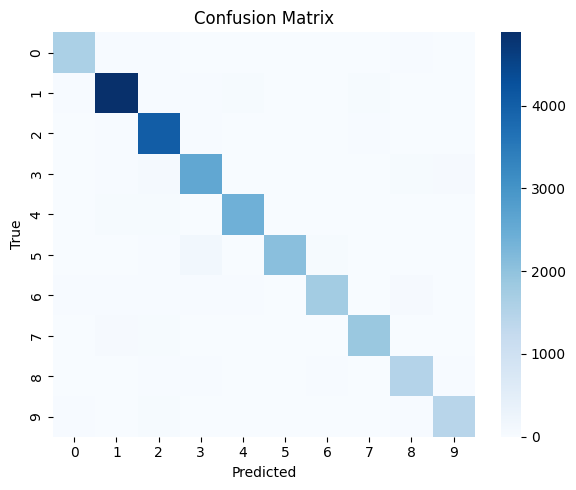

In [5]:
test_metrics, y_true, y_pred, cm = evaluate(model, test_loader, device, criterion)

print("Test metrics:")
for k, v in test_metrics.items():
    print(f"{k}: {v:.4f}")

plot_confusion_matrix(cm, CLASS_NAMES)